In [1]:
import numpy as np
import pandas as pd
import scipy as scp
import pickle 
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [17]:
tt = pd.read_csv('/media/data_cifs/afengler/data/real/chong/chongdata.csv')

In [97]:
tt['highDim'].unique()

array([1, 3, 2])

In [108]:
s1 = tt.loc[tt['subj'] == 1]

In [111]:
s1

,anglePer,blockN,colorPer,correct,highDim,highDimCoh,irrDim,irrDimCoh,lineCoh,lineDir,angleOption,lowDim,lowDimCoh,response,rxtime,subj,isHighCorrect,isLowCorrect,lineOption,Unnamed: 19
0,0.70,1,0.42,0,1,2,2,1,0.7,2,1,3,2,4,6.58130,1,1,0,2,NaN
1,0.30,1,0.42,0,1,2,2,1,0.7,2,2,3,2,3,6.58130,1,1,0,2,NaN
2,0.70,1,0.58,1,1,1,3,2,0.4,1,1,2,1,1,3.38240,1,1,1,1,NaN
3,0.30,1,0.42,1,1,1,2,1,0.6,2,2,3,2,4,2.99910,1,1,1,2,NaN
4,0.58,1,0.30,1,1,2,3,1,0.3,1,1,2,2,2,1.54990,1,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.30,4,0.30,1,1,2,2,2,0.7,2,2,3,2,4,1.63290,1,1,1,2,NaN
508,0.30,4,0.30,1,1,2,2,2,0.7,2,2,3,2,4,2.09950,1,1,1,2,NaN
509,0.70,4,0.42,0,1,2,3,2,0.3,1,1,2,1,1,0.94967,1,1,0,1,NaN
510,0.42,4,0.30,1,1,2,3,1,0.3,1,2,2,2,2,2.33270,1,1,1,1,NaN


In [112]:
s1red = s1[['correct','anglePer', 'colorPer', 'lineCoh', 'response', 'isHighCorrect', 'isLowCorrect', 'lowDim', 'highDim']]

In [113]:
resp1 = s1red.loc[s1red['response'] == 1]
resp2 = s1red.loc[s1red['response'] == 2]
resp3 = s1red.loc[s1red['response'] == 3]
resp4 = s1red.loc[s1red['response'] == 4]

In [119]:
resp2.loc[resp2['correct'] == 1]

,correct,anglePer,colorPer,lineCoh,response,isHighCorrect,isLowCorrect,lowDim,highDim
4,1,0.58,0.30,0.3,2,1,1,2,1
26,1,0.58,0.42,0.3,2,1,1,2,1
35,1,0.30,0.42,0.4,2,1,1,2,1
36,1,0.70,0.42,0.3,2,1,1,2,1
39,1,0.58,0.30,0.3,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...
471,1,0.30,0.42,0.4,2,1,1,2,1
483,1,0.42,0.30,0.3,2,1,1,2,1
485,1,0.58,0.42,0.3,2,1,1,2,1
506,1,0.42,0.30,0.4,2,1,1,2,1


In [115]:
resp4.loc[resp4['correct'] == 1]

,correct,anglePer,colorPer,lineCoh,response,isHighCorrect,isLowCorrect,lowDim,highDim
3,1,0.30,0.42,0.6,4,1,1,3,1
10,1,0.30,0.30,0.6,4,1,1,3,1
19,1,0.42,0.30,0.6,4,1,1,3,1
28,1,0.30,0.30,0.6,4,1,1,3,1
30,1,0.42,0.58,0.6,4,1,1,3,1
...,...,...,...,...,...,...,...,...,...
453,1,0.30,0.42,0.6,4,1,1,3,1
461,1,0.30,0.70,0.7,4,1,1,3,1
481,1,0.42,0.70,0.6,4,1,1,3,1
507,1,0.30,0.30,0.7,4,1,1,3,1


In [114]:
resp3.loc[resp3['correct'] == 1]

,correct,anglePer,colorPer,lineCoh,response,isHighCorrect,isLowCorrect,lowDim,highDim
7,1,0.58,0.58,0.7,3,1,1,3,1
12,1,0.70,0.30,0.7,3,1,1,3,1
17,1,0.70,0.30,0.6,3,1,1,3,1
25,1,0.58,0.70,0.6,3,1,1,3,1
34,1,0.70,0.42,0.7,3,1,1,3,1
...,...,...,...,...,...,...,...,...,...
475,1,0.70,0.58,0.7,3,1,1,3,1
488,1,0.70,0.30,0.7,3,1,1,3,1
491,1,0.58,0.30,0.7,3,1,1,3,1
493,1,0.58,0.30,0.6,3,1,1,3,1


In [96]:
resp4.loc[resp4['correct'] == 1]['highDim'].unique()

array([1])

In [101]:
resp3.loc[resp3['correct'] == 0]

,correct,anglePer,colorPer,lineDir,angleOption,response,isHighCorrect,isLowCorrect,lowDim,highDim
1,0,0.30,0.42,2,2,3,1,0,3,1
14,0,0.42,0.58,2,2,3,1,0,3,1
23,0,0.70,0.30,1,1,3,0,1,2,1
29,0,0.58,0.58,1,1,3,0,1,2,1
31,0,0.42,0.42,2,2,3,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...
500,0,0.42,0.30,2,2,3,1,0,3,1
501,0,0.30,0.70,2,2,3,1,0,3,1
503,0,0.58,0.58,1,1,3,0,1,2,1
504,0,0.42,0.30,2,2,3,1,0,3,1


In [69]:
resp4.

array([1, 2, 3])

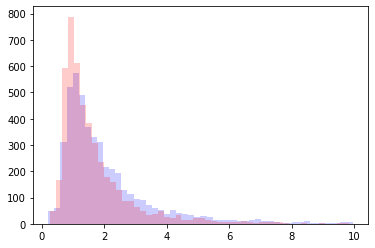

In [48]:
color = ['blue', 'red', 'green']
for i in [1,2]:
    plt.hist(tt.loc[(tt['lowDimCoh'] == i) & (tt['highDimCoh'] == 2) & ]['rxtime'], bins = 50, alpha = 0.2, color = color[i - 1])

In [ ]:
for i in [1, 2]:
    for j in [1, 2]:
        print(tt.loc[(tt['lowDimCoh'] == i) & (tt['highDimCoh'] == j) & (tt['subj'] == 3)]['rxtime'].mean())

In [29]:
tt.loc[tt['lowDimCoh'] == i & tt['highDimCoh'] == i]

SyntaxError: invalid syntax (<ipython-input-29-2cc2de4d369d>, line 1)

In [31]:
tt.loc[tt['lowDimCoh'] == 1 & tt['highDimCoh'] == 1]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [35]:
(tt['lowDimCoh'] == 1) & (tt['highDimCoh'] == 1)

0        False
1        False
2         True
3        False
4        False
         ...  
18852    False
18853    False
18854     True
18855     True
18856     True
Length: 18857, dtype: bool